# Analysis of scraped data from No Fluff Jobs

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('job_postings.csv')

In [3]:
df.head()

,position,salary_lower,salary_upper,main_skill,seniority,main_category,posting_href
0,Remote Enrichment Content Manager,6000,11000,NaN,Junior,Big Data,https://nofluffjobs.com/pl/job/remote-enrichme...
1,ServiceNow Business Analyst,12000,20000,NaN,Mid,Business Analysis,https://nofluffjobs.com/pl/job/servicenow-busi...
2,Data Engineer with SQL,17000,22000,sql,Mid,Big Data,https://nofluffjobs.com/pl/job/data-engineer-w...
3,Remote React Fullstack Developer,14000,20000,react,Mid,Frontend,https://nofluffjobs.com/pl/job/remote-react-fu...
4,[Remote] Data Analyst,26250,31500,NaN,Mid,Business Intelligence,https://nofluffjobs.com/pl/job/remote-data-ana...


Data describes more than 1000 job postings in Warsaw, Poland. It was scraped from No Fluff Jobs site([https://nofluffjobs.com/pl/warszawa?page=1](https://nofluffjobs.com/pl/warszawa?page=1)).

## Main skills

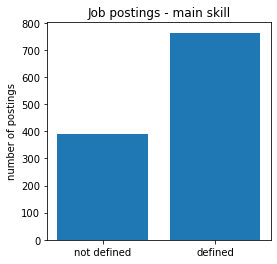

In [4]:
is_na, is_not_na = df[df['main_skill'].isna()].shape[0], df[df['main_skill'].notna()].shape[0]
plt.rcParams["figure.figsize"] = (4,4)
plt.bar(['not defined', 'defined'], [is_na, is_not_na])
plt.title('Job postings - main skill')
plt.ylabel('number of postings')
plt.show()

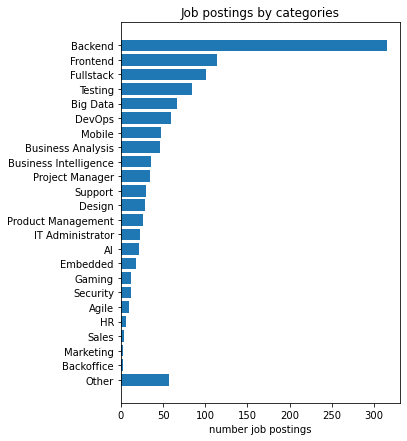

In [5]:
df1 = df.groupby('main_category').agg({'main_category' : ['count']})['main_category'].reset_index()
tmp = df1[df1.main_category != 'Other'].sort_values(by=['count'])
x, y = tmp['main_category'].to_list(), tmp['count'].to_list()
tmp = df1[df1.main_category == 'Other']
x.insert(0, 'Other')
y.insert(0, tmp['count'].to_list()[0])

plt.rcParams["figure.figsize"] = (5,7)
plt.barh(x, y)
plt.title('Job postings by categories')
plt.xlabel('number job postings')
plt.show()

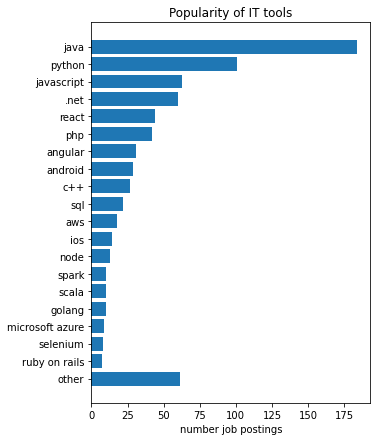

'other'

In [6]:
df1 = df[df['main_skill'].notna()][['main_skill']].groupby('main_skill').agg({'main_skill' : ['count']})['main_skill']
df1.sort_values(by=['count'], inplace=True)
df1.reset_index(inplace=True)

x, y = df1['main_skill'], df1['count']
popular, not_popular = y >= 5, y < 5
not_popular_tools = sum(y[not_popular].values)
x = x[popular].to_list()
x.insert(0, 'other')
y = y[popular].to_list()
y.insert(0, not_popular_tools)

plt.rcParams["figure.figsize"] = (5,7)
plt.barh(x, y)
plt.title('Popularity of IT tools')
plt.xlabel('number job postings')
plt.show()
x.pop(0)

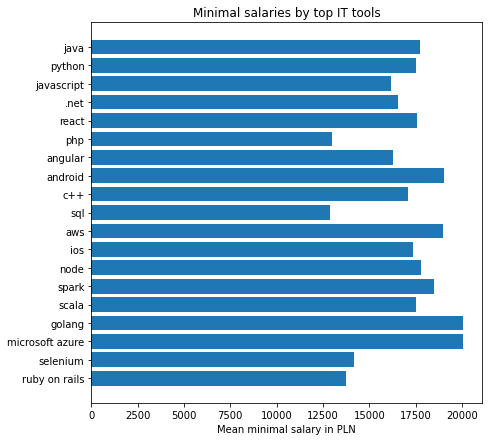

In [7]:
df1 = df[df['main_skill'].notna()][['main_skill', 'salary_lower']].groupby('main_skill').agg({'salary_lower' : ['mean']})['salary_lower']
df1 = df1.loc[pd.Index(x), :]
plt.rcParams["figure.figsize"] = (7,7)
plt.barh(df1.index, df1['mean'])
plt.title('Minimal salaries by top IT tools')
plt.xlabel('Mean minimal salary in PLN')
plt.show()

## Seniority

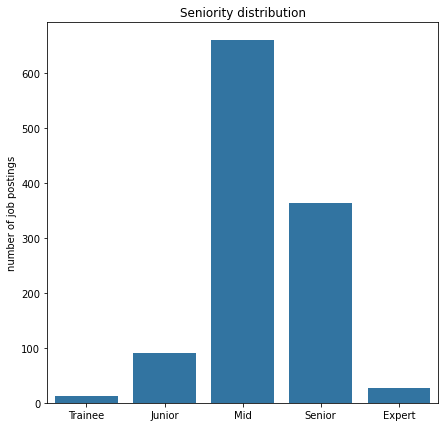

In [8]:
df1 = df.groupby('seniority').agg({'seniority' : ['count']})['seniority']
df1.reset_index(inplace=True)
sns.barplot(
    data=df1,
    x='seniority',
    y='count', 
    order=['Trainee', 'Junior', 'Mid', 'Senior', 'Expert'],
    color='C0',
)
plt.xlabel('')
plt.title('Seniority distribution')
plt.ylabel('number of job postings')
plt.show()

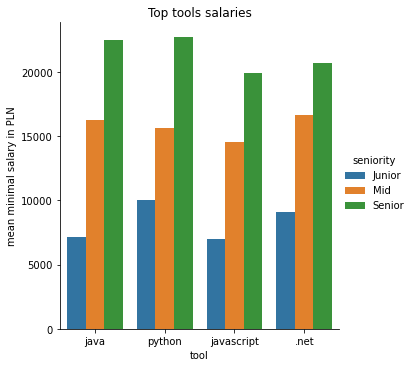

In [9]:
df1 = df[df.main_skill.isin(['java', 'python', 'javascript', '.net'])]
df1 = df1[df1.seniority.isin(['Junior', 'Mid', 'Senior'])]
df1 = df1.groupby(['main_skill', 'seniority']).agg({'salary_lower' : 'mean'}).reset_index()

sns.catplot(
    data=df1, kind="bar",
    x="main_skill", 
    y="salary_lower", 
    hue="seniority",
    order=['java', 'python', 'javascript', '.net']
)
plt.title('Top tools salaries')
plt.xlabel('tool')
plt.ylabel('mean minimal salary in PLN')
plt.show()

## Junior positions

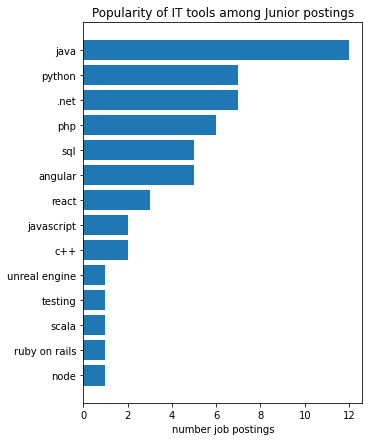

In [10]:
df1 = df[df['main_skill'].notna() & (df.seniority == 'Junior')][['main_skill']].groupby('main_skill').agg({'main_skill' : ['count']})['main_skill']
df1.sort_values(by=['count'], inplace=True)
df1.reset_index(inplace=True)

x, y = df1['main_skill'], df1['count']

plt.rcParams["figure.figsize"] = (5,7)
plt.barh(x, y)
plt.title('Popularity of IT tools among Junior postings')
plt.xlabel('number job postings')
plt.xticks(np.arange(0, y[len(y)-1]+1, 2))
plt.show()

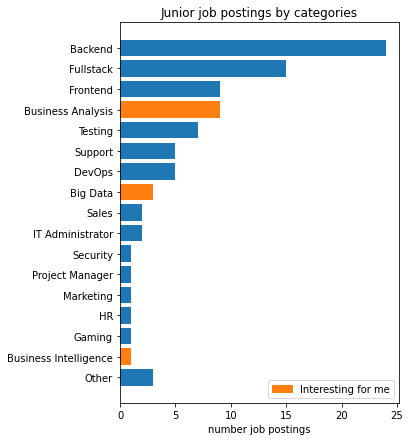

In [11]:
df1 = df[df.seniority == 'Junior'].groupby('main_category').agg({'main_category' : ['count']})['main_category'].reset_index()
tmp = df1[df1.main_category != 'Other'].sort_values(by=['count'])
x, y = tmp['main_category'].to_list(), tmp['count'].to_list()
tmp = df1[df1.main_category == 'Other']
x.insert(0, 'Other')
y.insert(0, tmp['count'].to_list()[0])

color = ['C0'] * len(x)
for i in range(len(x)):
    if 'Analysis' in x[i] or 'Intelligence' in x[i] or 'Data' in x[i]:
        color[i] = 'C1'

plt.rcParams["figure.figsize"] = (5,7)
fig, ax = plt.subplots()
red_patch = mpatches.Patch(color='C1', label='Interesting for me')
ax.barh(x, y, color=color)
plt.title('Junior job postings by categories')
plt.xlabel('number job postings')
ax.legend(handles=[red_patch])
plt.show()

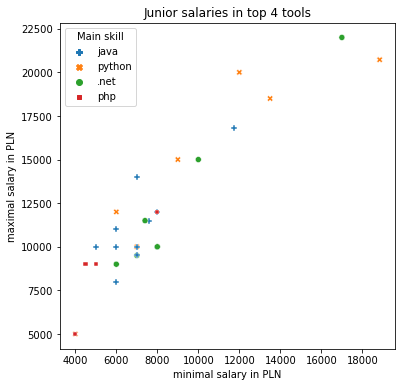

In [12]:
df1 = df[df.seniority == 'Junior']
df1 = df1[df1.main_skill.isin(['java', 'python', '.net', 'php'])]
plt.rcParams["figure.figsize"] = (6,6)
ax = sns.scatterplot(
    data=df1,
    x="salary_lower", 
    y="salary_upper", 
    hue="main_skill",
    legend = 'full',
    hue_order=['java', 'python', '.net', 'php'],
    style='main_skill'
)
ax.legend(title='Main skill')
plt.xlabel('minimal salary in PLN')
plt.ylabel('maximal salary in PLN')
plt.title('Junior salaries in top 4 tools')
plt.show()